# 作业二：幺正变换与Bloch球

In [1]:
###### -- QUANTA -- #######
# Author: Y. Liu, W. Shi  #
# Data: 2022-09-17        #
###########################

from qutip import *
from scipy.linalg import *
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

## 第一步：证明 $U=e^{i\alpha}R_{\vec{n}}(\theta)$

提交纸质作业（照片或扫描件），粘贴到该文本中
![](image.png.png)

## 第二步：U矩阵的解析与重建

完善以下代码：

In [2]:
def resolveUnitary(U):
    alpha = 0.0000
    n = np.array([0.0000, 0.0000, 1.0000], dtype = float)
    theta = np.pi/4
    #######################################
    #todo: modify the following code to complete this function. The initial values are assigned manually
    

    #######################################
    U_params = {'alpha': alpha, 'n': n, 'theta': theta}
    return U_params

def rebuildUnitary(U_params):
    alpha = U_params['alpha']
    n = U_params['n']
    theta = U_params['theta']
    #######################################
    #todo: modify the following code to complete this function. The initial values are assigned manually
    
    #U = np.array([[1.0000 + 0.0000j, 0.0000 + 0.0000j],[0.0000 + 0.0000j, 1.0000 + 0.0000j]], dtype = complex)
    #######################################
    return U


### 测试代码

请同学们直接运行以下代码块检查所实现函数的正确性

注：同学们可参考测试数据，但请勿修改测试代码！

In [10]:
#don't modify the code in this block
n_ck = 10
U_ck = np.array([[[-0.6707 + 0.6665j,  0.2031 - 0.2545j],
                  [-0.0453 + 0.3224j, -0.0234 + 0.9452j]],
                 [[ 0.8792 + 0.0575j, -0.1825 + 0.4364j],
                  [ 0.4730 - 0.0043j,  0.2785 - 0.8359j]],
                 [[-0.5751 - 0.6049j,  0.1465 - 0.5310j],
                  [ 0.5344 - 0.1332j, -0.5904 - 0.5900j]],
                 [[ 0.4716 - 0.6140j,  0.1917 - 0.6032j],
                  [-0.6234 - 0.1099j,  0.7627 - 0.1330j]],
                 [[ 0.5559 + 0.8131j, -0.0088 - 0.1725j],
                  [ 0.1709 + 0.0247j,  0.7583 + 0.6286j]],
                 [[ 0.8838 - 0.4675j, -0.0088 + 0.0181j],
                  [-0.0140 + 0.0144j, -0.1410 + 0.9898j]],
                 [[-0.0874 + 0.8127j,  0.0353 - 0.5750j],
                  [-0.1685 + 0.5509j, -0.2030 + 0.7918j]],
                 [[-0.4976 - 0.7870j, -0.3288 + 0.1578j],
                  [ 0.1857 + 0.3138j, -0.8510 + 0.3778j]],
                 [[-0.1367 + 0.8515j, -0.3078 - 0.4018j],
                  [ 0.0605 - 0.5026j, -0.5511 - 0.6634j]],
                 [[ 0.2000 + 0.5090j,  0.4764 - 0.6885j],
                  [-0.7248 - 0.4191j, -0.0365 - 0.5456j]]], dtype = complex)

U_params_ck = [ { 'alpha' : 5.1191, 'n' : np.array([-0.1790, -0.6547,  0.7344], dtype=float), 'theta' : 5.2824}, 
                { 'alpha' : 5.6913, 'n' : np.array([-0.3633,  0.5512, -0.7512], dtype=float), 'theta' : 1.5977},
                { 'alpha' : 0.7979, 'n' : np.array([ 0.8633,  0.5043,  0.0194], dtype=float), 'theta' : 5.1163},
                { 'alpha' : 5.7389, 'n' : np.array([ 0.6018, -0.6878,  0.4059], dtype=float), 'theta' : 1.5301},
                { 'alpha' : 3.9732, 'n' : np.array([-0.4976, -0.6054,  0.6212], dtype=float), 'theta' : 5.8387},
                { 'alpha' : 0.6129, 'n' : np.array([-0.0223, -0.0036,  0.9997], dtype=float), 'theta' : 2.1990},
                { 'alpha' : 1.7499, 'n' : np.array([-0.1169,  0.9879,  0.1015], dtype=float), 'theta' : 1.2352},
                { 'alpha' : 3.4362, 'n' : np.array([ 0.3473, -0.3789, -0.8578], dtype=float), 'theta' : 1.5776},
                { 'alpha' : 6.0162, 'n' : np.array([ 0.5018,  0.2044, -0.8405], dtype=float), 'theta' : 3.8707},
                { 'alpha' : 6.0626, 'n' : np.array([ 0.5696, -0.6177, -0.5423], dtype=float), 'theta' : 2.9738} ]

def checkResolveUnitary():
    print("Check unitary resolving...")
    err = 0.0000
    for it in range(n_ck):
        U_dict = resolveUnitary(U_ck[it])

        a_diff_1 = abs(U_dict['alpha'] - U_params_ck[it]['alpha'])
        n_diff_1 = np.sum(abs(U_dict['n'] - U_params_ck[it]['n']))
        t_diff_1 = abs(U_dict['theta'] - U_params_ck[it]['theta'])
        
        a_diff_2 = abs(abs(U_dict['alpha'] - U_params_ck[it]['alpha']) - np.pi)
        n_diff_2 = np.sum(abs(U_dict['n'] + U_params_ck[it]['n']))
        t_diff_2 = abs(U_dict['theta'] + U_params_ck[it]['theta'] - 2 * np.pi)
        err = err + min(a_diff_1 + n_diff_1 + t_diff_1, a_diff_2 + n_diff_2 + t_diff_2)
    if err < 0.01:
        print('Pass!')
    else:
        print('Wrong Answer err = %.3f! Please Correct the code.' % err)

def checkRebuildUnitary():
    print("Check unitary rebuilding...")
    err = 0.0000
    for it in range(n_ck):
        U = rebuildUnitary(U_params_ck[it])
        err = err + np.sum(abs(U - U_ck[it]))
    if err < 0.01:
        print('Pass!')
    else:
        print('Wrong Answer err = %.3f! Please Correct the code.' % err)
        
checkResolveUnitary()
checkRebuildUnitary()

Check unitary resolving...
Wrong Answer err = 53.547! Please Correct the code.
Check unitary rebuilding...
Wrong Answer err = 35.908! Please Correct the code.


## 第三步：幺正变换的绘制

下面的代码将$U$的作用效果绘制在Bloch球上。修改代码完成幺正变换的旋转轴绘制

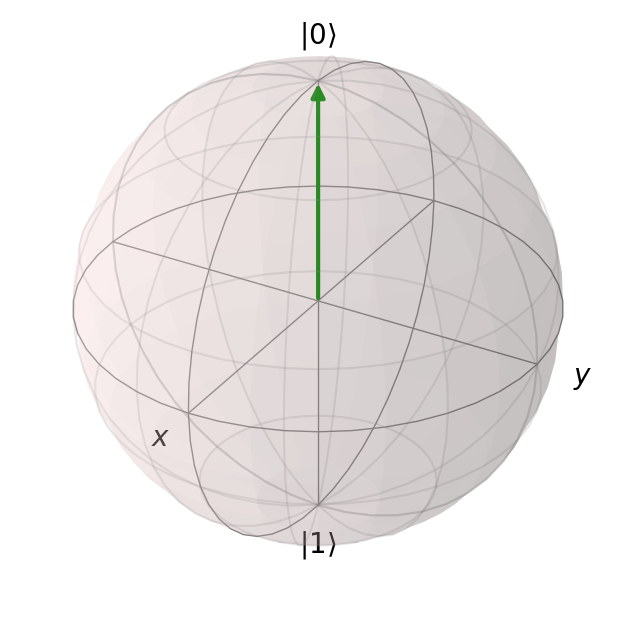

In [5]:
fig = plt.figure(figsize=(6,6))
axes = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(axes)
sphere = Bloch(axes = axes)

#example:

U = np.array([[2**(-0.5), 2**(-0.5)], [2**(-0.5), -2**(-0.5)]], dtype = complex)
U_p = resolveUnitary(U)
sphere.add_vectors(U_p['n'])

U_1 = np.array([[0.3536 + 0.6124j, 0.6124 - 0.3536j],
                [0.6124 - 0.3536j, 0.3536 + 0.6124j]], dtype = complex)
psi_1 = np.array([[0.7337 + 0.0000j], [0.5213 + 0.4358j]], dtype = complex)
psi_2 = np.matmul(U_1, psi_1)
######################
#todo:
#plot the rotation axis of U_1, psi_1, psi_2 onto the Bloch sphere
#Note: there is an overall phase in U_1, which is passed to psi_2



######################
sphere.make_sphere()

#when using CMD to run this script, the Bloch sphere can be shown in an independent view by the following code.
#fig.show()

## 第四步： 任意U矩阵的ZYZ分解

完成下面的代码，实现任意酉矩阵的Z-Y-Z分解:$$U=e^{i\alpha}R_z(\beta)R_y(\gamma)R_z(\delta)$$

In [6]:
def R_z(theta):
    return np.matrix([[np.exp(-1j * theta / 2), 0],[0, np.exp(1j * theta / 2)]])

def R_y(theta):
    return np.matrix([[np.cos(theta/2), -np.sin(theta/2)],[np.sin(theta/2), np.cos(theta/2)]])

def R_x(theta):
    return np.matrix([[np.cos(theta/2), -1j * np.sin(theta/2)], [-1j * np.sin(theta/2), np.cos(theta/2)]])

def ZYZ_Decomp(U):
    alpha = 0.0000
    beta = 0.0000
    gamma = 0.0000
    delta = 0.0000
    #######################################
    #todo: modify the following code to complete this function. The initial values are assigned manually

    #######################################
    return [alpha, beta, gamma, delta]

### 测试ZYZ分解

In [7]:
U_ck_zyz = np.array([[-0.5000 + 0.5000j,  0.7071 - 0.0000j],
                     [-0.7071 + 0.0000j, -0.5000 - 0.5000j]], dtype = complex)

p = ZYZ_Decomp(U_ck_zyz)

U_reb = np.exp(1j * p[0]) * R_z(p[1]) * R_y(p[2]) * R_z(p[3])
err = np.sum(abs(U_reb - U_ck_zyz))

if err < 0.01:
    print('Pass')    
else:
    print('Wrong Answer err = %.3f! Please Correct the code.' % err)

Wrong Answer err = 4.576! Please Correct the code.
